In [5]:
from torch import nn
from loss import LossBinary
from torch.optim import Adam
from torch.utils.data import DataLoader
%matplotlib inline
from pylab import *
import cv2
import torch
from dataset import load_image
from utils import cuda
from generate_masks import get_model
from albumentations import Compose, Normalize
from albumentations.pytorch.functional import img_to_tensor
from validation import validation_binary
from dataset import RoboticsDataset
import glob
import matplotlib.pyplot as plt
from torch.utils.data.dataset import Dataset  # For custom data-sets
from torchvision import transforms
from torchsummary import summary
rcParams['figure.figsize'] = 10, 10

In [6]:
def img_transform(p=1):
    return Compose([
        Normalize(p=1)
    ], p=p)


In [7]:
def mask_overlay(image, mask, color=(0, 255, 0)):
    """
    Helper function to visualize mask on the top of the car
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.uint8)
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.)
    img = image.copy()
    ind = mask[:, :, 1] > 0    
    img[ind] = weighted_sum[ind]    
    return img

In [8]:
model_path = 'data/models/unet11_binary_20/model_0.pt'
model = get_model(model_path, model_type='UNet11', problem_type='binary')

In [9]:
from train_ft import train

jaccard_weight = 0.3
#fold = 1
root = !pwd
root = root[0]
batch_size = 4
n_epochs = 20
lr1 = 0.0001
lr2 = 0.00001
num_workers = 12
train_size = 0.6
for fold in range(1,5) :
  print(fold)
  train(model, "unet11", 0, "ent", jaccard_weight, fold, root, batch_size, n_epochs+10, lr1, num_workers, 1, train_size)
  train(model, "unet11", 0, "ent", jaccard_weight, fold, root, batch_size, n_epochs+20, lr2, num_workers, 1, train_size)
  n_epochs = n_epochs+20

1
num train = 24, num_val = 16


Epoch 21, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Restored model, epoch 21, step 6,760


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Epoch 22, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.45432, jaccard: 0.57171


Epoch 23, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.41059, jaccard: 0.62165


Epoch 24, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.31884, jaccard: 0.63798


Epoch 25, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.26810, jaccard: 0.63664


Epoch 26, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.19819, jaccard: 0.71341


Epoch 27, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.17517, jaccard: 0.73707


Epoch 28, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.14572, jaccard: 0.77485


Epoch 29, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.13723, jaccard: 0.78366


Epoch 30, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.13643, jaccard: 0.78796


Epoch 31, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.13010, jaccard: 0.79333
num train = 24, num_val = 16
Restored model, epoch 31, step 6,820


Epoch 32, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.12376, jaccard: 0.80148


Epoch 33, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.12253, jaccard: 0.80500


Epoch 34, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.12561, jaccard: 0.80310


Epoch 35, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.12154, jaccard: 0.80622


Epoch 36, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.12223, jaccard: 0.80644


Epoch 37, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.12282, jaccard: 0.80743


Epoch 38, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.12110, jaccard: 0.81059


Epoch 39, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.12083, jaccard: 0.81161


Epoch 40, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.12043, jaccard: 0.81300


Epoch 40, lr 1e-05: 100%|██████████| 24/24 [00:03<00:00,  7.90it/s, loss=0.02759]


Valid loss: 0.12157, jaccard: 0.81217
2


Epoch 41, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

num train = 24, num_val = 16
Restored model, epoch 41, step 6,880


Epoch 42, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.25700, jaccard: 0.70542


Epoch 43, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.19056, jaccard: 0.75480


Epoch 44, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.31004, jaccard: 0.73416


Epoch 45, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.21056, jaccard: 0.77906


Epoch 46, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.17923, jaccard: 0.78354


Epoch 47, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.17015, jaccard: 0.78306


Epoch 48, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.12385, jaccard: 0.81146


Epoch 49, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.11847, jaccard: 0.82265


Epoch 50, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.11608, jaccard: 0.82578


Epoch 51, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.11376, jaccard: 0.82799
num train = 24, num_val = 16
Restored model, epoch 51, step 6,940


Epoch 52, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.14249, jaccard: 0.80073


Epoch 53, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.11911, jaccard: 0.82567


Epoch 54, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.14512, jaccard: 0.80057


Epoch 55, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.14704, jaccard: 0.79991


Epoch 56, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.13751, jaccard: 0.80940


Epoch 57, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.15597, jaccard: 0.79349


Epoch 58, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.15242, jaccard: 0.79923


Epoch 59, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.15782, jaccard: 0.79650


Epoch 60, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.15692, jaccard: 0.79781


Epoch 60, lr 1e-05: 100%|██████████| 24/24 [00:02<00:00,  8.03it/s, loss=0.02122]


Valid loss: 0.16025, jaccard: 0.79630
3


Epoch 61, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

num train = 24, num_val = 16
Restored model, epoch 61, step 7,000


Epoch 62, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.16204, jaccard: 0.78417


Epoch 63, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.18805, jaccard: 0.77543


Epoch 64, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.16687, jaccard: 0.79455


Epoch 65, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.17414, jaccard: 0.80116


Epoch 66, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.18436, jaccard: 0.80841


Epoch 67, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.18457, jaccard: 0.80827


Epoch 68, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.17354, jaccard: 0.81171


Epoch 69, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.17346, jaccard: 0.81861


Epoch 70, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.17120, jaccard: 0.81837


Epoch 71, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.18002, jaccard: 0.82083
num train = 24, num_val = 16
Restored model, epoch 71, step 7,060


Epoch 72, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.18094, jaccard: 0.81925


Epoch 73, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.19160, jaccard: 0.81894


Epoch 74, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.18541, jaccard: 0.81480


Epoch 75, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.19123, jaccard: 0.81604


Epoch 76, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.19691, jaccard: 0.81901


Epoch 77, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.19557, jaccard: 0.81886


Epoch 78, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.20463, jaccard: 0.81929


Epoch 79, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.20243, jaccard: 0.81874


Epoch 80, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.20721, jaccard: 0.81879


Epoch 80, lr 1e-05: 100%|██████████| 24/24 [00:03<00:00,  7.98it/s, loss=0.01617]


Valid loss: 0.21161, jaccard: 0.81764
4


Epoch 81, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

num train = 24, num_val = 16
Restored model, epoch 81, step 7,120


Epoch 82, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.18667, jaccard: 0.73011


Epoch 83, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.11837, jaccard: 0.84033


Epoch 84, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.11443, jaccard: 0.81618


Epoch 85, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.09868, jaccard: 0.83621


Epoch 86, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.08285, jaccard: 0.86255


Epoch 87, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.08089, jaccard: 0.86862


Epoch 88, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.08252, jaccard: 0.87021


Epoch 89, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.08079, jaccard: 0.87130


Epoch 90, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.08294, jaccard: 0.87044


Epoch 91, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.08834, jaccard: 0.86990
num train = 24, num_val = 16
Restored model, epoch 91, step 7,180


Epoch 92, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.08447, jaccard: 0.86840


Epoch 93, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.09117, jaccard: 0.86821


Epoch 94, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.08698, jaccard: 0.86768


Epoch 95, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.08830, jaccard: 0.86677


Epoch 96, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.09234, jaccard: 0.86464


Epoch 97, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.09281, jaccard: 0.86415


Epoch 98, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.09547, jaccard: 0.86334


Epoch 99, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.09643, jaccard: 0.86318


Epoch 100, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 0.09685, jaccard: 0.86345


Epoch 100, lr 1e-05: 100%|██████████| 24/24 [00:03<00:00,  7.96it/s, loss=0.02004]


Valid loss: 0.09783, jaccard: 0.86389


In [15]:
for param in model.parameters():
  param.requires_grad = False
  #print(param.requires_grad)
for p in model.final.parameters():
  p.requires_grad = True
  #print(p.requires_grad)

In [16]:
jaccard_weight = 0.3
#fold = 1
root = !pwd
root = root[0]
batch_size = 4
n_epochs = 20
lr = 0.0001
num_workers = 12
train_size = 0.6
for fold in range(1,5) :
  print(fold)
  train(model, "unet11", 0, "ft", jaccard_weight, fold, root, batch_size, n_epochs+10, lr1, num_workers, 1, train_size)
  train(model, "unet11", 0, "ft", jaccard_weight, fold, root, batch_size, n_epochs+20, lr2, num_workers, 1, train_size)
  n_epochs = n_epochs+20

Epoch 21, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

1
num train = 24, num_val = 16
Restored model, epoch 21, step 6,760


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Epoch 22, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.83955, jaccard: 0.12402


Epoch 23, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.82309, jaccard: 0.12403


Epoch 24, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.80657, jaccard: 0.12403


Epoch 25, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.79028, jaccard: 0.12404


Epoch 26, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.77382, jaccard: 0.12404


Epoch 27, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.75704, jaccard: 0.12404


Epoch 28, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.74065, jaccard: 0.12405


Epoch 29, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.72412, jaccard: 0.12405


Epoch 30, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.70757, jaccard: 0.12406


Epoch 31, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.69122, jaccard: 0.12406
num train = 24, num_val = 16
Restored model, epoch 31, step 6,820


Epoch 32, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.68959, jaccard: 0.12406


Epoch 33, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.68795, jaccard: 0.12406


Epoch 34, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.68632, jaccard: 0.12406


Epoch 35, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.68466, jaccard: 0.12406


Epoch 36, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.68303, jaccard: 0.12406


Epoch 37, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.68135, jaccard: 0.12406


Epoch 38, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.67971, jaccard: 0.12406


Epoch 39, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.67804, jaccard: 0.12406


Epoch 40, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.67640, jaccard: 0.12406


Epoch 41, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 3.67475, jaccard: 0.12407
2
num train = 24, num_val = 16
Restored model, epoch 41, step 6,880


Epoch 42, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.64188, jaccard: 0.14676


Epoch 43, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.63147, jaccard: 0.14676


Epoch 44, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.62102, jaccard: 0.14677


Epoch 45, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.61037, jaccard: 0.14677


Epoch 46, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.59977, jaccard: 0.14677


Epoch 47, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.58903, jaccard: 0.14678


Epoch 48, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.57832, jaccard: 0.14678


Epoch 49, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.56771, jaccard: 0.14679


Epoch 50, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.55701, jaccard: 0.14679


Epoch 51, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.54653, jaccard: 0.14680
num train = 24, num_val = 16
Restored model, epoch 51, step 6,940


Epoch 52, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.54545, jaccard: 0.14680


Epoch 53, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.54438, jaccard: 0.14680


Epoch 54, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.54330, jaccard: 0.14680


Epoch 55, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.54225, jaccard: 0.14680


Epoch 56, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.54120, jaccard: 0.14680


Epoch 57, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.54012, jaccard: 0.14680


Epoch 58, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.53906, jaccard: 0.14680


Epoch 59, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.53800, jaccard: 0.14680


Epoch 60, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.53693, jaccard: 0.14680


Epoch 61, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.53586, jaccard: 0.14680
3
num train = 24, num_val = 16
Restored model, epoch 61, step 7,000


Epoch 62, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.36328, jaccard: 0.17583


Epoch 63, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.35343, jaccard: 0.17584


Epoch 64, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.34390, jaccard: 0.17585


Epoch 65, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.33428, jaccard: 0.17585


Epoch 66, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.32463, jaccard: 0.17586


Epoch 67, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.31505, jaccard: 0.17587


Epoch 68, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.30542, jaccard: 0.17588


Epoch 69, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.29566, jaccard: 0.17589


Epoch 70, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.28621, jaccard: 0.17590


Epoch 71, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.27666, jaccard: 0.17591
num train = 24, num_val = 16
Restored model, epoch 71, step 7,060


Epoch 72, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.27570, jaccard: 0.17591


Epoch 73, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.27477, jaccard: 0.17591


Epoch 74, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.27385, jaccard: 0.17591


Epoch 75, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.27292, jaccard: 0.17591


Epoch 76, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.27197, jaccard: 0.17591


Epoch 77, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.27102, jaccard: 0.17591


Epoch 78, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.27007, jaccard: 0.17591


Epoch 79, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.26910, jaccard: 0.17591


Epoch 80, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.26818, jaccard: 0.17591


Epoch 81, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.26723, jaccard: 0.17591
4
num train = 24, num_val = 16
Restored model, epoch 81, step 7,120


Epoch 82, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.73795, jaccard: 0.11112


Epoch 83, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.72544, jaccard: 0.11113


Epoch 84, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.71292, jaccard: 0.11114


Epoch 85, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.70051, jaccard: 0.11115


Epoch 86, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.68783, jaccard: 0.11115


Epoch 87, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.67507, jaccard: 0.11117


Epoch 88, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.66282, jaccard: 0.11117


Epoch 89, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.65044, jaccard: 0.11118


Epoch 90, lr 0.0001:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.63803, jaccard: 0.11119


Epoch 91, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.62549, jaccard: 0.11120
num train = 24, num_val = 16
Restored model, epoch 91, step 7,180


Epoch 92, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.62424, jaccard: 0.11120


Epoch 93, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.62298, jaccard: 0.11120


Epoch 94, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.62172, jaccard: 0.11120


Epoch 95, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.62046, jaccard: 0.11120


Epoch 96, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.61921, jaccard: 0.11120


Epoch 97, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.61795, jaccard: 0.11120


Epoch 98, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.61671, jaccard: 0.11120


Epoch 99, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.61545, jaccard: 0.11120


Epoch 100, lr 1e-05:   0%|          | 0/24 [00:00<?, ?it/s]

Valid loss: 2.61419, jaccard: 0.11120


Epoch 100, lr 1e-05: 100%|██████████| 24/24 [00:01<00:00, 14.94it/s, loss=2.64500]


Valid loss: 2.61293, jaccard: 0.11120


In [19]:
model_ent_path = 'data/models_ft/unet11_binary_20/model_0_ent.pt'
model_ent = get_model(model_ent_path, model_type='UNet11', problem_type='binary')

model_path = 'data/models/unet11_binary_20/model_0.pt'
model = get_model(model_path, model_type='UNet11', problem_type='binary')

model_ft_path = 'data/models_ft/unet11_binary_20/model_0_ft.pt'
model_ft = get_model(model_ft_path, model_type='UNet11', problem_type='binary')

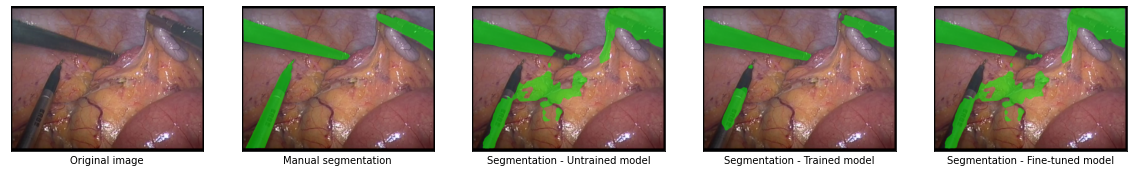

In [20]:
img_file_name = 'data/Training/OP1/Raw/img_02_raw.png'
image = load_image(img_file_name)
H,W,C = image.shape
with torch.no_grad():
    input_image = torch.unsqueeze(img_to_tensor(img_transform(p=1)(image=image)['image']).cuda(), dim=0)

mask_dataset = load_image('data/Training/OP1/Masks/img_02_class.png')
mask_dataset = sum(mask_dataset,2)

plt.figure(figsize=(20,20))
plt.subplot(151) # Original image
plt.xticks([])
plt.yticks([])
plt.grid(False)
imshow(image)
plt.xlabel('Original image')

plt.subplot(152) # Ground truth
plt.xticks([])
plt.yticks([])
plt.grid(False)
imshow(mask_overlay(image, (mask_dataset > 0).astype(np.uint8)))
plt.xlabel('Manual segmentation')

plt.subplot(153) # Model before training
mask_before = model(input_image)
mask_b = mask_before.data[0].cpu().numpy()[0]
plt.xticks([])
plt.yticks([])
plt.grid(False)
imshow(mask_overlay(image, (mask_b > 0).astype(np.uint8)))
plt.xlabel('Segmentation - Untrained model')

plt.subplot(154) # Trained model
mask_after = model_ent(input_image)
mask_a = mask_after.data[0].cpu().numpy()[0]
plt.xticks([])
plt.yticks([])
plt.grid(False)
imshow(mask_overlay(image, (mask_a > 0).astype(np.uint8)))
plt.xlabel('Segmentation - Trained model')

plt.subplot(155) # Fine-tuned model
mask_ft = model_ft(input_image)
mask_f = mask_ft.data[0].cpu().numpy()[0]
plt.xticks([])
plt.yticks([])
plt.grid(False)
imshow(mask_overlay(image, (mask_f > 0).astype(np.uint8)))
plt.xlabel('Segmentation - Fine-tuned model')

plt.show()